In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv("./train-chennai-sale.csv")

In [3]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

# DATA CLEANING

# AREA

In [8]:
df["AREA"].unique()   # words are misspelled

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [9]:
correct_words={"Karapakam":"Karapakkam","Velchery":"Velachery","Adyr":"Adyar","Chormpet":"Chrompet","Ann Nagar":"Anna Nagar"\
                 ,"KKNagar":"KK Nagar","Ana Nagar" :"Anna Nagar","TNagar":"T Nagar","Chrompt":"Chrompet","Chrmpet":"Chrompet"}
df["AREA"].replace(correct_words, inplace=True)
df["AREA"].unique() 

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

# DATE OF BUILD AND DATE OF SALE

In [10]:
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"]).dt.year
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"]).dt.year

In [11]:
df["AGE"]=df["DATE_SALE"]-df["DATE_BUILD"]
df.drop(["DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

# BEDROOMS

In [12]:
df["N_BEDROOM"].unique()

array([1., 2., 3., 4.])

# BATHROOMS

In [13]:
df["N_BATHROOM"].unique()

array([1., 2.])

# ROOMS

In [14]:
df["N_ROOM"].unique()

array([3, 5, 4, 2, 6], dtype=int64)

# SALES CONDITION

In [15]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [16]:
correct_names={"Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial","Adj Land":"AdjLand"}
df["SALE_COND"]=df["SALE_COND"].replace(correct_names)
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

# PARKING FACILITY

In [17]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [18]:
df["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
df["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

# BUILDING TYPE

In [19]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [20]:
df["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"},inplace=True)
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

# STREET

In [21]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [22]:
df["STREET"].replace({"NoAccess":"No Access","Pavd":"Paved"},inplace=True)
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

# MZ ZONE 

In [23]:
# characteristics of zone
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

# UTILITY AVAILABLE

In [24]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [25]:
df["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSewr ":"NoSeWr"},inplace=True)
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSeWr', 'NoSeWa'], dtype=object)

# EXPLORATORY DATA ANALYSIS

In [26]:
# AREA

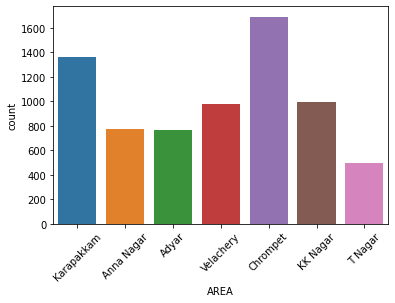

In [27]:
sns.countplot(x=df["AREA"])
plt.xticks(rotation=45)
plt.show()

In [28]:
# MOST NUMBER OF HOUSES ARE LOCATED IN CHROMPET,NEXT IS KARAPAKKAM

In [29]:
df["LOG_SALES"]=np.log(df["SALES_PRICE"])

In [30]:
# THE PRICE RANGE OF HOUSES ACCORDING TO THEIR LOCATION
# Q1  - WHERE CAN I GET HOUSE FOR CHEAPEST PRICE??

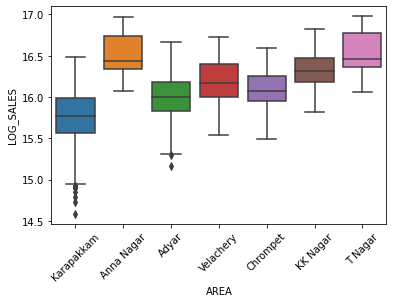

In [31]:
sns.boxplot(x=df["AREA"],y=df["LOG_SALES"])
plt.xticks(rotation=45)
plt.show()

In [32]:
# IN AVERAGE ,ANNA NAGAR IS COSTLY AREA 
# NEXT IS T NAGAR 
# RELATIVELY CHEAPEST PRICES OF HOUSES ARE LOCATED IN KARAPAKKAM

# SQFT

<AxesSubplot:xlabel='INT_SQFT', ylabel='Count'>

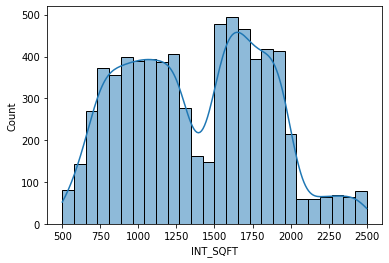

In [33]:
sns.histplot(df["INT_SQFT"],kde=True)

In [34]:
# The 1300 -1500 sqft area is not frequent home area size IN CHENNAI

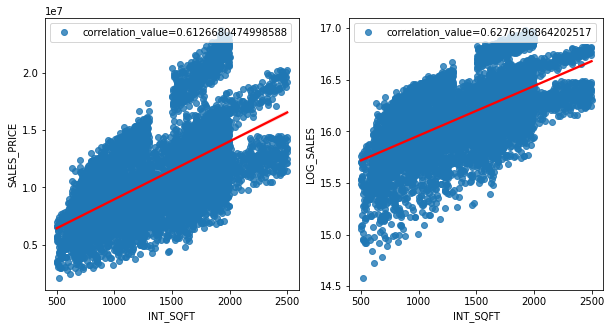

In [35]:
def scatterplot(feature,dependent1,dependent2):
    j=0
    plt.figure(figsize=(10,5))
    for i in [dependent1,dependent2]:
        plt.subplot(1,2,j+1)
        corr_value=df[[feature,i]].corr().iloc[1,0]
        sns.regplot(x=feature,y=i,data=df,line_kws={"color":"r"},label=f"correlation_value={corr_value}")
        plt.legend(loc="upper left")
        j+=1
    plt.show()
scatterplot("INT_SQFT","SALES_PRICE","LOG_SALES")

In [36]:
# LOG_SALES SHOWS MORE LINEARITY WITH FEATURES

# AGE

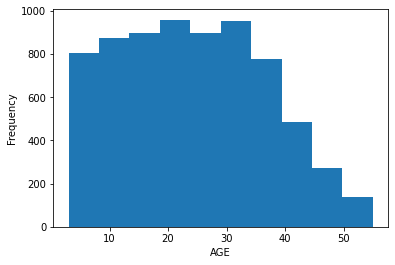

In [37]:
df["AGE"].plot(kind="hist",bins=10)
plt.xlabel("AGE")
plt.show()

In [38]:
# THE CONSTRUCTION OF HOUSES IS STEADY FOR 30 YEARS

In [39]:
df[["AGE","LOG_SALES","SALES_PRICE"]].corr()

,AGE,LOG_SALES,SALES_PRICE
AGE,1.000000,-0.138950,-0.120418
LOG_SALES,-0.138950,1.000000,0.970289
SALES_PRICE,-0.120418,0.970289,1.000000


In [40]:
# TRANSFORMING THE DATA AND CHECK FOR LINEARITY
df["dummy"]=np.log(df["AGE"])
print("The correlation score for  log transformation of AGE feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["AGE"],0.5)
print("The correlation score for  sqrt transformation of AGE feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["AGE"],2)
print("The correlation score for  square transformation of AGE feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["AGE"],3)
print("The correlation score for cube transformation of AGE feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])


The correlation score for  log transformation of AGE feature  -0.11999276691053092
The correlation score for  sqrt transformation of AGE feature  -0.1311531941439829
The correlation score for  square transformation of AGE feature  -0.14569516689955353
The correlation score for cube transformation of AGE feature  -0.144765771246365


In [41]:
# THE AGE FEATURE IS NOT FITTED FOR LINEARITY WITH SALES PRICE

# DISTANCE FROM MAINROAD

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Count'>

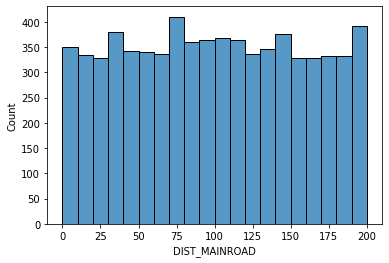

In [42]:
sns.histplot(df["DIST_MAINROAD"])

In [43]:
# Keeping mianroad as centre the distribution of houses(lands) are eqally distributed
# ie spread of houses is even in all range of distance from mainroad

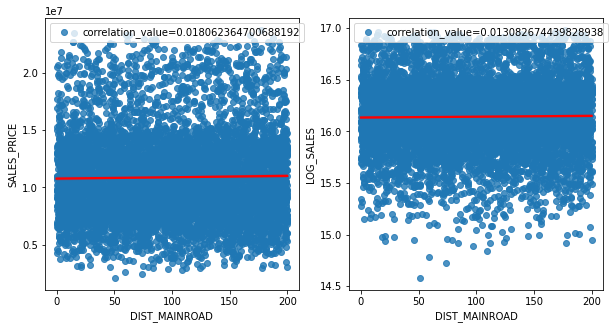

In [44]:
scatterplot("DIST_MAINROAD","SALES_PRICE","LOG_SALES")

In [45]:
# TRANFORMING THE DATA AND CHECK IF IT FITS LINEAR WITH SALES PRICE
df["dummy"]=np.log(df["DIST_MAINROAD"])
print("The correlation score for  log transformation of DIST_MAINROAD feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["DIST_MAINROAD"],0.5)
print("The correlation score for  sqrt transformation of DIST_MAINROAD feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["DIST_MAINROAD"],2)
print("The correlation score for  square transformation of DIST_MAINROAD feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["DIST_MAINROAD"],3)
print("The correlation score for cube transformation of DIST_MAINROAD feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])

The correlation score for  log transformation of DIST_MAINROAD feature  0.005306369815149152
The correlation score for  sqrt transformation of DIST_MAINROAD feature  0.0095864493689394
The correlation score for  square transformation of DIST_MAINROAD feature  0.016970811291895035
The correlation score for cube transformation of DIST_MAINROAD feature  0.018406031536532894


C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# BEDROOMS

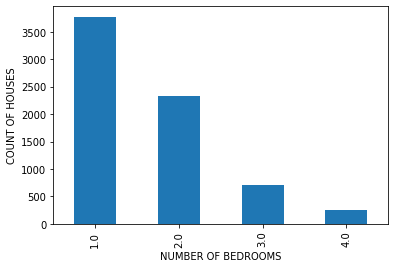

In [46]:
df["N_BEDROOM"].value_counts().plot(kind="bar")
plt.xlabel("NUMBER OF BEDROOMS")
plt.ylabel("COUNT OF HOUSES")
plt.show()

In [47]:
# It is clear that around Chennai most of the houses are with bedrooms 1 or 2 ..

<AxesSubplot:xlabel='N_BEDROOM', ylabel='LOG_SALES'>

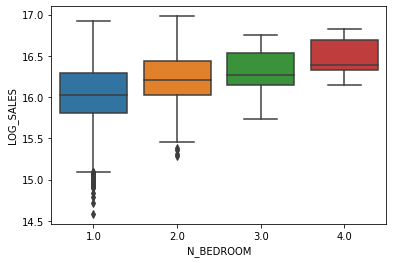

In [48]:
sns.boxplot(x=df["N_BEDROOM"],y=df["LOG_SALES"])

In [49]:
# It is as expected that sales price increase with increase in bedrooms.
# yet , some of houses with single bedrooms(extreme values) has price greater than bedrooms .
# Is they are any special or they are outliers?

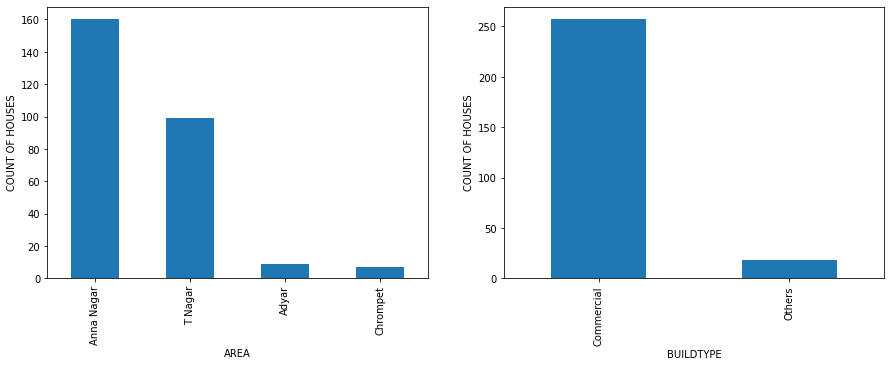

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df[(df["N_BEDROOM"]==1) & (df["LOG_SALES"]>16.5)]["AREA"].value_counts().plot(kind="bar") # house having 1 bedroom and greater 
                                                                                          # than log_sales of 16.5
plt.xlabel("AREA")                                                                        
plt.ylabel("COUNT OF HOUSES")
# plt.show()
plt.subplot(1,2,2)
df[(df["N_BEDROOM"]==1) & (df["LOG_SALES"]>16.5)]["BUILDTYPE"].value_counts().plot(kind="bar") 
plt.xlabel("BUILDTYPE")                                                                                              
plt.ylabel("COUNT OF HOUSES")
plt.show()

In [51]:
# THIS SHOWS THE EXTREME VALUE PRICE OF HOUSES ARE DUE TO COMMERCIAL LAND AND LOCATION OF AREA IS ANNA NAGAR AND T NAGAR
# WE HAVE SEEN THAT PRICE OF HOUSES WITH LOCATION OF AREA VARIES ,ESPECIALLY THE ANNA NAGAR IS COSTLY AREA

# BATHROOMS

<AxesSubplot:xlabel='N_BATHROOM', ylabel='LOG_SALES'>

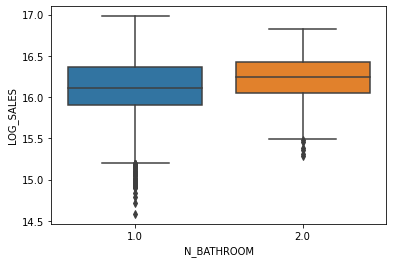

In [52]:
sns.boxplot(x=df["N_BATHROOM"],y=df["LOG_SALES"])

In [53]:
# QUESTION - SOME HOUSES WITH SINGLE BATHROOM HAVE PRICES HIGHER THAN TWO BATHROOMS ,WHY?

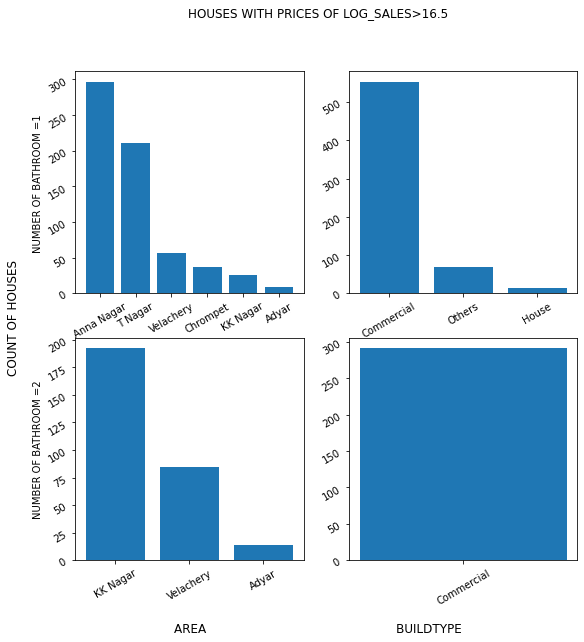

In [54]:

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(9,9))

e=df[(df["N_BATHROOM"]==1) & (df["LOG_SALES"]>16.5)]["AREA"].value_counts()
ax1.bar(x=e.index,height=e.values)
ax1.set_ylabel("NUMBER OF BATHROOM =1")
ax1.tick_params(labelrotation=30)

e=df[(df["N_BATHROOM"]==1) & (df["LOG_SALES"]>16.5)]["BUILDTYPE"].value_counts()
ax2.bar(x=e.index,height=e.values)
# ax2.set_ylabel("NUMBER OF BATHROOM =1")
ax2.tick_params(labelrotation=30)


e=df[(df["N_BATHROOM"]==2) & (df["LOG_SALES"]>16.5)]["AREA"].value_counts()
ax3.bar(x=e.index,height=e.values)
ax3.set_ylabel("NUMBER OF BATHROOM =2")
ax3.tick_params(labelrotation=30)

e=df[(df["N_BATHROOM"]==2) & (df["LOG_SALES"]>16.5)]["BUILDTYPE"].value_counts()
ax4.bar(x=e.index,height=e.values)
ax4.tick_params(labelrotation=30)




fig.supylabel("COUNT OF HOUSES")
fig.supxlabel("AREA                                                 BUILDTYPE")
fig.suptitle("HOUSES WITH PRICES OF LOG_SALES>16.5")
plt.show()

In [53]:
# THIS SHOWS AGAIN THAT HOUSES IN ANNA NAGAR AND T  NAGAR IS COSTLY
# THE COMMERCIAL LAND ARE HIGH IN ANNA NAGAR AND T NAGAR.THIS MAKES ON REASON THAT COST OF LIVING THERE MAY BE HIGH

# ROOMS

<AxesSubplot:xlabel='N_ROOM', ylabel='count'>

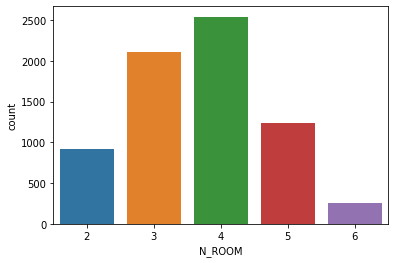

In [54]:
sns.countplot(x=df["N_ROOM"])
# 6 ROOMS ARE QUITE RARE BUT 3 OR 4 ROOMS ARE FREQUENT 

<AxesSubplot:xlabel='N_ROOM', ylabel='LOG_SALES'>

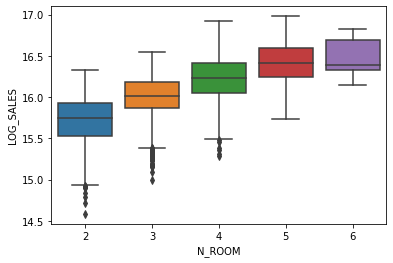

In [55]:
sns.boxplot(x=df["N_ROOM"],y=df["LOG_SALES"])

In [56]:
# PRICE OF HOUSE ARE IN LINE WITH ROOMS

# SALES_CONDITION

<AxesSubplot:xlabel='SALE_COND', ylabel='count'>

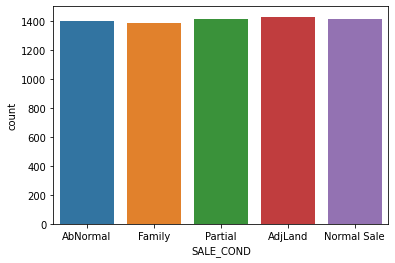

In [57]:
sns.countplot(x=df["SALE_COND"])

In [58]:
# ALL TYPES ARE EQUALLY DISTRIBUTED

<AxesSubplot:xlabel='SALE_COND', ylabel='LOG_SALES'>

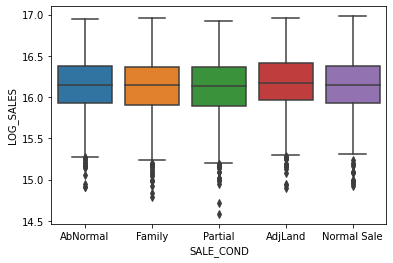

In [59]:
sns.boxplot(x=df["SALE_COND"],y=df["LOG_SALES"])

In [60]:
# THIS FEATURE DOES NOT MAKE MUCH DIFFERENCE TO THE SALES PRICE

# PARKING FACILITY

<AxesSubplot:xlabel='PARK_FACIL', ylabel='LOG_SALES'>

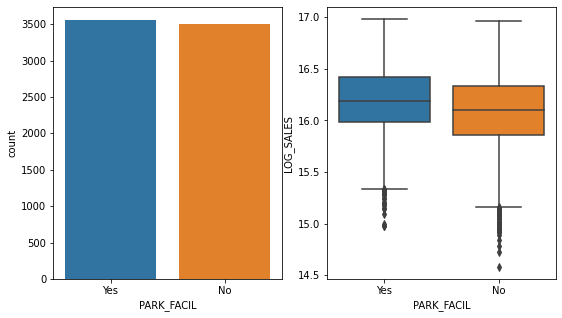

In [61]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.countplot(x=df["PARK_FACIL"])

plt.subplot(1,2,2)
sns.boxplot(x=df["PARK_FACIL"],y=df["LOG_SALES"])

# BUILD TYPES

<AxesSubplot:xlabel='BUILDTYPE', ylabel='count'>

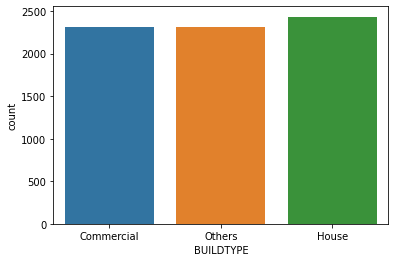

In [62]:
sns.countplot(x=df["BUILDTYPE"])
# EQUAL COUNT OF BUILDTYPES ARE THERE IN CHENNAI LOCATION

<AxesSubplot:xlabel='BUILDTYPE', ylabel='LOG_SALES'>

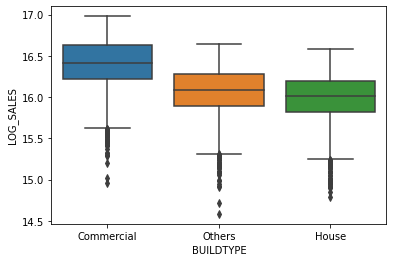

In [63]:
sns.boxplot(x=df["BUILDTYPE"],y=df["LOG_SALES"])

In [64]:
# THE PRICE OF COMMERCIAL BUILDINGS ARE HIGH AS EXPECTED

# MZ ZONE

<AxesSubplot:xlabel='MZZONE', ylabel='count'>

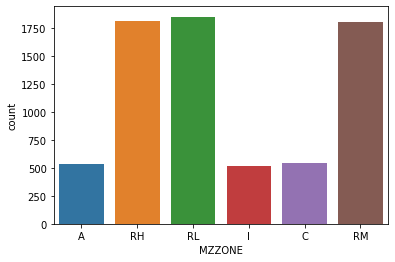

In [65]:
sns.countplot(x=df["MZZONE"])

<AxesSubplot:xlabel='MZZONE', ylabel='LOG_SALES'>

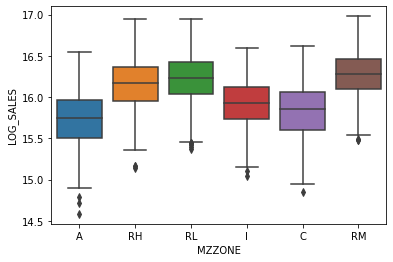

In [66]:
sns.boxplot(x=df["MZZONE"],y=df["LOG_SALES"])

In [67]:
# RESIDENTIAL ZONE HAVE HIGH SALESPRICE

# UTILITY_AVAIL

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='count'>

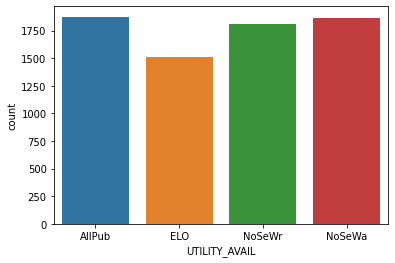

In [68]:
sns.countplot(x=df["UTILITY_AVAIL"])

In [69]:
# AllPub---All public Utilities (E,G,W,& S)
# NoSewr---Electricity, Gas, and Water (Septic Tank)
# NoSeWa---Electricity and Gas Only
# ELO---Electricity only

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='LOG_SALES'>

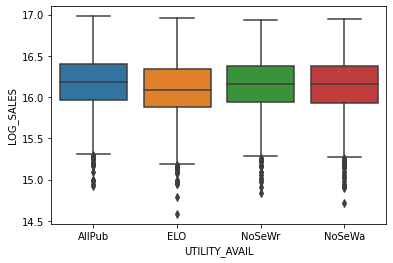

In [70]:
sns.boxplot(x=df["UTILITY_AVAIL"],y=df["LOG_SALES"])

In [71]:
# NO LINEARITY 

# STREET

<AxesSubplot:xlabel='STREET', ylabel='count'>

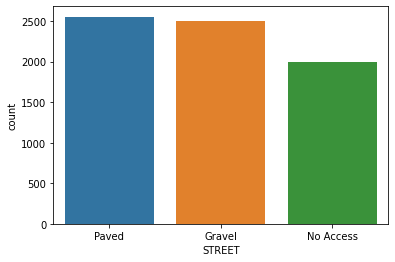

In [72]:
sns.countplot(x=df["STREET"])

<AxesSubplot:xlabel='STREET', ylabel='LOG_SALES'>

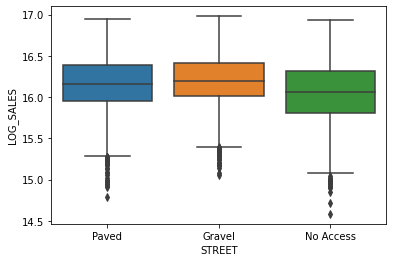

In [73]:
sns.boxplot(x=df["STREET"],y=df["LOG_SALES"])

# Q_ROOMS

In [74]:
df[["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","LOG_SALES"]].corr()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,LOG_SALES
QS_ROOMS,1.000000,0.009111,0.009570,0.517906,0.022332
QS_BATHROOM,0.009111,1.000000,-0.012320,0.551172,-0.010991
QS_BEDROOM,0.009570,-0.012320,1.000000,0.630583,0.021749
QS_OVERALL,0.517906,0.551172,0.630583,1.000000,0.022169
LOG_SALES,0.022332,-0.010991,0.021749,0.022169,1.000000


In [75]:
# TRANSFORMING DATA AND CHECK IF IT FITS FOR LINEAR WITH SALES
df["dummy"]=np.log(df["QS_OVERALL"])
print("The correlation score for  log transformation of QS_OVERALL feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["QS_OVERALL"],0.5)
print("The correlation score for  sqrt transformation of QS_OVERALL feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["QS_OVERALL"],2)
print("The correlation score for  square transformation of QS_OVERALL feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])
df["dummy"]=np.power(df["QS_OVERALL"],3)
print("The correlation score for cube transformation of QS_OVERALL feature ",df[["dummy","LOG_SALES"]].corr()["LOG_SALES"][0])

The correlation score for  log transformation of QS_OVERALL feature  0.021323526075910676
The correlation score for  sqrt transformation of QS_OVERALL feature  0.021799624215166756
The correlation score for  square transformation of QS_OVERALL feature  0.02257621878612916
The correlation score for cube transformation of QS_OVERALL feature  0.022552337385486357


In [76]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,LOG_SALES,dummy
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.0,3.9,4.9,4.330,380000,144400,7600000,44,15.843659,81.182737
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,4.9,4.2,2.5,3.765,760122,304049,21717770,11,16.893641,53.369722
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,4.1,3.8,2.2,3.090,421094,92114,13159200,20,16.392632,29.503629
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,4.7,3.9,3.6,4.010,356321,77042,9630290,22,16.080424,64.481201
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,3.0,2.5,4.1,3.290,237000,74063,7406250,30,15.817835,35.611289


In [77]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'LOG_SALES', 'dummy'],
      dtype='object')

In [78]:
# WHAT  SQUARE FEET THE COMMERCIAL BUILDINGS OR HOUSES ARE STARTING?.

<AxesSubplot:xlabel='INT_SQFT', ylabel='LOG_SALES'>

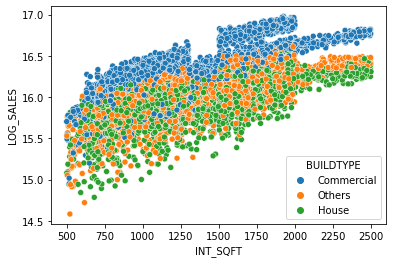

In [79]:
sns.scatterplot(x=df["INT_SQFT"],y=df["LOG_SALES"],hue=df["BUILDTYPE"])

In [80]:
print("----------FOR EVERY RANGE OF SQAUREFEET COMMERCIAL LAND IS AVAILABLE-------")
print("THE MINIMUM SQUAREFEET  FOR COMMERCIAL BUILDING IS ",df[df["BUILDTYPE"]=="Commercial"]["INT_SQFT"].min())
print("THE MAXIMUM SQUAREFEET FOR COMMERCIAL BUILDING  IS ",df[df["BUILDTYPE"]=="Commercial"]["INT_SQFT"].max())

----------FOR EVERY RANGE OF SQAUREFEET COMMERCIAL LAND IS AVAILABLE-------
THE MINIMUM SQUAREFEET  FOR COMMERCIAL BUILDING IS  500
THE MAXIMUM SQUAREFEET FOR COMMERCIAL BUILDING  IS  2498


In [ ]:
# EVEN SPREAD OF SQUAREFEET FOR SALES PRICES

In [81]:
# WHAT IS THE HIGHEST PRICE OF BUILDING AND WHAT IS THEIR FEATURE?

In [82]:
large=df.groupby("BUILDTYPE")       
indexes=[]
for i,y in large:
    indexes.append(list(y.nlargest(1,"LOG_SALES").index)[0])
df.loc[indexes,:]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE,LOG_SALES,dummy
837,P08983,T Nagar,1925,177,2.0,1.0,5,Normal Sale,Yes,Commercial,...,3.5,4.6,3.6,3.820,923026,378677,23667340,7,16.979607,55.742968
6235,P00449,T Nagar,1982,152,2.0,1.0,5,AdjLand,Yes,House,...,2.7,5.0,4.9,4.265,397023,111167,15880930,19,16.580630,77.581310
4715,P05301,Anna Nagar,2000,49,2.0,1.0,5,AbNormal,Yes,Others,...,3.9,4.0,2.4,3.325,573206,118013,16859010,13,16.640396,36.759953


In [83]:
# WHICH AREA SHOULD BE CHOSED WHEN I WANT MY HOUSE TO BE NEAR MAIN ROAD?

In [84]:
df[df["DIST_MAINROAD"]==0].shape

(33, 23)

In [138]:
df[df["BUILDTYPE"]=="House"].nsmallest(100,"DIST_MAINROAD")["AREA"].value_counts()

Chrompet      30
KK Nagar      16
Karapakkam    16
Velachery     15
Anna Nagar     9
Adyar          7
T Nagar        7
Name: AREA, dtype: int64

<AxesSubplot:ylabel='AREA'>

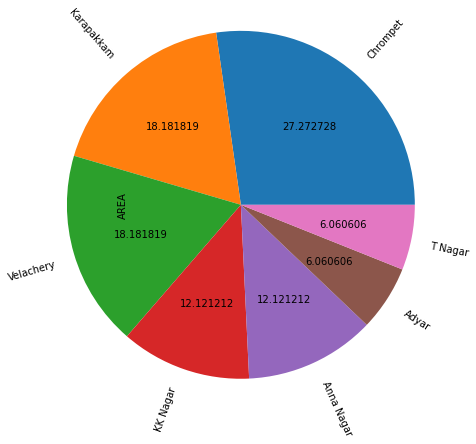

In [86]:
df[df["BUILDTYPE"]=="House"].nsmallest(33,"DIST_MAINROAD")["AREA"].value_counts().plot(kind="pie",rotatelabels=True,
                                                                                        autopct="%f",radius=2)


In [87]:
# CHROMEPET OR KARAPAKKAM OR VELACHERY ARE BEST CHOICE FOR THOSE WHO WANT HOUSE TO BE NEAR MAIN ROAD.

In [88]:
# IS PRICE IS QUITE HIGH SO AS TO BE NEAR THE MAIN ROAD?

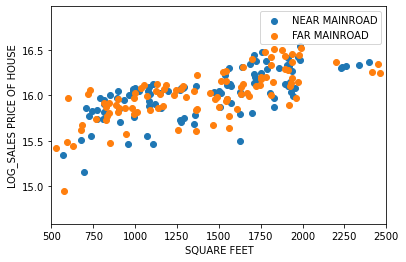

In [89]:

plt.scatter(x=df[df["BUILDTYPE"]=="House"].nsmallest(100,"DIST_MAINROAD")["INT_SQFT"],
                                y=df[df["BUILDTYPE"]=="House"].nsmallest(100,"DIST_MAINROAD")["LOG_SALES"],label="NEAR MAINROAD")
plt.scatter(x=df[df["BUILDTYPE"]=="House"].nlargest(100,"DIST_MAINROAD")["INT_SQFT"],
                                y=df[df["BUILDTYPE"]=="House"].nlargest(100,"DIST_MAINROAD")["LOG_SALES"],label=f"FAR MAINROAD")

plt.ylim((df["LOG_SALES"].min(),df["LOG_SALES"].max()))
plt.xlim((df["INT_SQFT"].min(),df["INT_SQFT"].max()))
plt.legend()
plt.xlabel("SQUARE FEET")
plt.ylabel("LOG_SALES PRICE OF HOUSE")
plt.show()

In [90]:
# THEY ARE ALMOST LAPPING EACH OTHER ,SIGNIFIES THAT MAIN ROAD DISTANCE IS NOT LINEAR WITH SALES PRICE 

In [91]:
# WHICH AREA IS NEW HOUSES(<10) HAS BEEN BUILD?

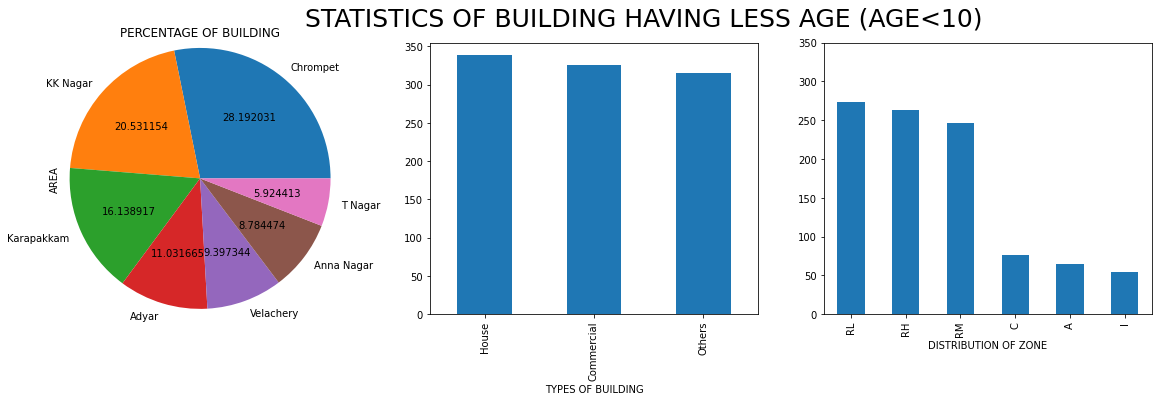

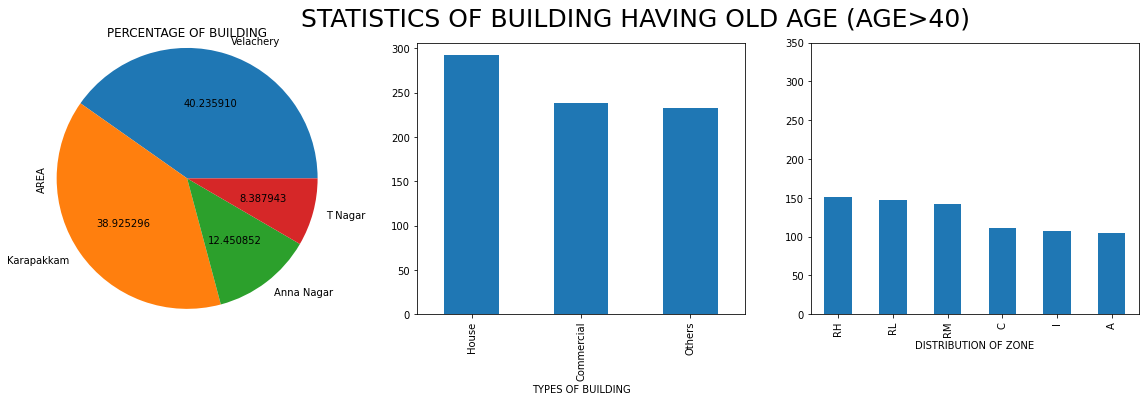

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df[df["AGE"]<10]["AREA"].value_counts().plot(kind="pie",autopct="%f",radius=1.2,title="PERCENTAGE OF BUILDING")

plt.subplot(1,3,2)
df[df["AGE"]<10]["BUILDTYPE"].value_counts().plot(kind="bar")                
plt.xlabel("TYPES OF BUILDING")

plt.subplot(1,3,3)
df[df["AGE"]<10]["MZZONE"].value_counts().plot(kind="bar")
plt.suptitle("                 STATISTICS OF BUILDING HAVING LESS AGE (AGE<10)",fontsize=25)
plt.xlabel("DISTRIBUTION OF ZONE")
plt.ylim((0,350))
plt.show() 
print("\n")

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df[df["AGE"]>40]["AREA"].value_counts().plot(kind="pie",autopct="%f",radius=1.2,title="PERCENTAGE OF BUILDING")


plt.subplot(1,3,2)
df[df["AGE"]>40]["BUILDTYPE"].value_counts().plot(kind="bar")               
plt.xlabel("TYPES OF BUILDING")

plt.subplot(1,3,3)
df[df["AGE"]>40]["MZZONE"].value_counts().plot(kind="bar")
plt.suptitle("                  STATISTICS OF BUILDING HAVING OLD AGE (AGE>40)",fontsize=25)
plt.ylim((0,350))
plt.xlabel("DISTRIBUTION OF ZONE")
# fig.supxlabel("PERCENTAGE OF BUILDING  TYPES OF BUILDING     DISTRIBUTION OF ZONE")
plt.show()      

In [93]:
# RECENT TIMES, NEW BUILDINGS ARE BUILD IN CHROMEPET AND KK NAGAR.

# 40YEARS OLD BUILDINGS WERE BUILD IN VELACHERY AND KARAPAKKAM.

# RELATIVELY HIGH PROPORTION OF BUILDING ARE IN RESIDENTIAL HIGH,MED,LOW THAN AGRICULTURE,INDUSTRIAL AND COMMERCIAL(AGE<10)

# RELATIVELY LOW PROPORTION OF BUILDING ARE IN RESIDENTIAL HIGH,MED,LOW THAN AGRICULTURE,INDUSTRIAL AND COMMERCIAL(AGE>40)

In [94]:
df=df.drop(["PRT_ID","REG_FEE","COMMIS","dummy"],axis=1)

In [95]:
model_scores={}

# MODEL

In [96]:
import copy 

# LINEAR REGRESSION

In [97]:
lr_data=df.copy()

In [98]:
lr_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,LOG_SALES
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,15.843659
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,16.893641
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,16.392632
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,16.080424
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,15.817835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49,15.493168
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9,16.196766
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28,15.937941
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32,15.956400


In [99]:
lr_data["AREA"]=lr_data["AREA"].replace(['Karapakkam', 'Adyar', 'Chrompet', 'Velachery',
       'KK Nagar', 'T Nagar', 'Anna Nagar'],[1,2,3,4,5,6,7])

In [100]:
lr_data["BUILDTYPE"]=lr_data["BUILDTYPE"].replace(['Commercial', 'Others', 'House'],[3,2,1])

In [101]:
lr_data["PARK_FACIL"]=lr_data["PARK_FACIL"].replace(['Yes', 'No'],[1,0])

In [102]:
lr_data["MZZONE"]=lr_data["MZZONE"].replace(['A', 'C','I', 'RH', 'RL',  'RM'],[1,2,3,4,5,6])

In [103]:
lr_data=pd.get_dummies(lr_data,columns=["STREET","UTILITY_AVAIL","SALE_COND"],drop_first=True)

In [104]:
pd.set_option('display.max_columns', None)
lr_data[:5]

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,LOG_SALES,STREET_No Access,STREET_Paved,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSeWr,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial
0,1,1004,131,1.0,1.0,3,1,3,1,4.0,3.9,4.9,4.330,7600000,44,15.843659,0,1,0,0,0,0,0,0,0
1,7,1986,26,2.0,1.0,5,0,3,4,4.9,4.2,2.5,3.765,21717770,11,16.893641,0,0,0,0,0,0,0,0,0
2,2,909,70,1.0,1.0,3,1,3,5,4.1,3.8,2.2,3.090,13159200,20,16.392632,0,0,1,0,0,0,0,0,0
3,4,1855,14,3.0,2.0,5,0,2,3,4.7,3.9,3.6,4.010,9630290,22,16.080424,0,1,0,0,1,0,1,0,0
4,1,1226,84,1.0,1.0,3,1,2,2,3.0,2.5,4.1,3.290,7406250,30,15.817835,0,0,0,0,0,0,0,0,0


In [105]:
x=lr_data.drop(["AGE","SALES_PRICE","LOG_SALES","QS_ROOMS","QS_BATHROOM","QS_BEDROOM"],axis=1)
y=lr_data["LOG_SALES"]

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=2)

In [107]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
def adjusted_r2_score(r2score,x):
    n_rows,n_feature=x.shape
    return 1 - (1-r2score) * (n_rows-1)/(n_rows-n_feature-1)

In [109]:
print("TRAINING SCORE :",adjusted_r2_score(lr.score(x_train,y_train),x_train))
print("TESTING SCORE  :",adjusted_r2_score(lr.score(x_test,y_test),x_test))
model_scores["LINEAR_REGRESSION"]=(adjusted_r2_score(lr.score(x_train,y_train),x_train),
                                   adjusted_r2_score(lr.score(x_test,y_test),x_test))

TRAINING SCORE : 0.9045778532275845
TESTING SCORE  : 0.8962638154642505


In [110]:
pd.DataFrame(sorted([*zip(lr.coef_,x.columns)],key=lambda x:abs(x[0]),reverse=True)[:10],columns=["IMPORTANCE","FEATURES"])

,IMPORTANCE,FEATURES
0,0.201694,BUILDTYPE
1,0.180826,N_ROOM
2,-0.143252,N_BEDROOM
3,0.109430,PARK_FACIL
4,-0.108783,STREET_No Access
5,0.072318,MZZONE
6,-0.050715,STREET_Paved
7,0.047229,AREA
8,-0.034254,SALE_COND_Partial
9,0.033656,N_BATHROOM


# DECISIONTREE REGRESSION

In [111]:
df.head(4)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,LOG_SALES
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,15.843659
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,16.893641
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,16.392632
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,16.080424


In [112]:
x=df.drop(["LOG_SALES","SALES_PRICE"],axis=1)
y=df["SALES_PRICE"]

In [113]:
for i in ["AREA","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]:
    le=LabelEncoder()
    x[i]=le.fit_transform(x[i])

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=30)

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=42)

In [116]:
dt.fit(x_train,y_train)
print("TRAINING SCORE :",dt.score(x_train,y_train))
print("TESTING SCORE  :",dt.score(x_test,y_test))

TRAINING SCORE : 1.0
TESTING SCORE  : 0.9519131870051807


In [117]:
paths=dt.cost_complexity_pruning_path(x_train,y_train)
alphas=paths.ccp_alphas[:-1]

In [118]:
len(alphas)

4841

In [119]:
dt.get_depth()

23

In [120]:
train_score=[]
test_score=[]
ranges=[8,10,12,14,16,18,20,22,23]
for i in ranges:
    dt=DecisionTreeRegressor(random_state=40,max_depth=i)
    score=cross_val_score(dt,x_train,y_train)
    train_score.append(score.mean())
    dt.fit(x_train,y_train)
    test_score.append(dt.score(x_test,y_test))

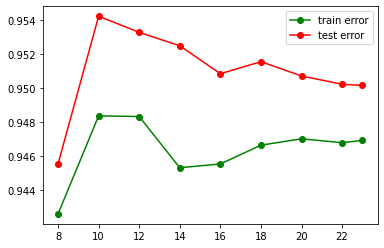

In [121]:
plt.plot(ranges,train_score,label="train error",marker="o",color="green")
plt.plot(ranges,test_score,label="test error",marker="o",color="red")
plt.legend()
# plt.savefig("G:/jupyter notebook/final project/image.jpg")
plt.show()

In [122]:
# low variance is reached at depth =18

In [123]:
dt=DecisionTreeRegressor(max_depth=18)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=18)

In [124]:
print("TRAINING SCORE :",dt.score(x_train,y_train))
print("TESTING SCORE  :",dt.score(x_test,y_test))
model_scores["DECISION_TREE"]=(dt.score(x_train,y_train),dt.score(x_test,y_test))

TRAINING SCORE : 0.9999922847560236
TESTING SCORE  : 0.9513234198693086


# RANDOMFOREST REGRESSOR

In [125]:
rdforest=RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1)
rdforest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [126]:
print("TRAINING SCORE 1:",rdforest.score(x_train,y_train))
print("TESTING SCORE 1:",rdforest.oob_score_)
print("TESTING SCORE  2:",rdforest.score(x_test,y_test))
model_scores["RANDOM_FOREST"]=(rdforest.score(x_train,y_train),rdforest.score(x_test,y_test))

TRAINING SCORE 1: 0.9969405731107166
TESTING SCORE 1: 0.9777175046839485
TESTING SCORE  2: 0.977390379500993


# GRADIENTBOOST REGRESSOR

In [127]:
gradient_boost=GradientBoostingRegressor()
gradient_boost.fit(x_train,y_train)

GradientBoostingRegressor()

In [128]:
print("TRAINING SCORE :",gradient_boost.score(x_train,y_train))
print("TESTING SCORE  :",gradient_boost.score(x_test,y_test))
model_scores["GRADIENT_BOOST"]=(gradient_boost.score(x_train,y_train),gradient_boost.score(x_test,y_test))

TRAINING SCORE : 0.9864671545169557
TESTING SCORE  : 0.984085233340021


In [129]:
# XGBOOST REGRESSOR

In [130]:
xgbregressor=XGBRegressor()
xgbregressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [131]:
print("TRAINING SCORE :",xgbregressor.score(x_train,y_train))
print("TESTING SCORE  :",xgbregressor.score(x_test,y_test))
model_scores["XGBOOST"]=(xgbregressor.score(x_train,y_train),xgbregressor.score(x_test,y_test))

TRAINING SCORE : 0.9995001324091275
TESTING SCORE  : 0.9927397619140731


In [132]:
x_values=[]
y_values=[]
names=[]
for i in model_scores.keys():
    x_values.append(model_scores[i][0])
    y_values.append(abs(model_scores[i][0]-model_scores[i][1]))
    names.append(i)

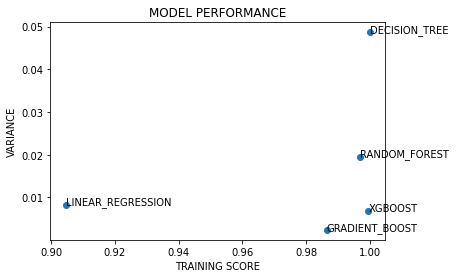

In [137]:
plt.scatter(x_values,y_values)
plt.ylabel("VARIANCE")
plt.xlabel("TRAINING SCORE")
plt.title("MODEL PERFORMANCE")

for i in range(len(names)):
    plt.text(x_values[i],y_values[i],names[i])
plt.savefig("performance_graph.jpg")
plt.show()    

# XGBOOST HAS HIGH ACCURACY AND LOW VARIANCE

# -----------------------------------------------THE END--------------------------------------------------